In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize

%matplotlib inline

In [53]:
from numpy import linalg as LA
from numpy.linalg import eig

$<m|H_0|n>= (n+\frac{1}{2})\delta_{mn}$

$H_{\lambda}=H_0+\lambda x^4$

### Eigenenergies of anharmonic oscialltor

In [126]:
'''
@param N = size of basis
@param lam = perturbation strength
'''

# matrix for H_0

def H_0(N):
    h0=np.zeros([N+1,N+1])
    for n in range(N+1):
        for m in range (N+1):
            if n==m:
                h0[n,m]=n+0.5
    return h0


In [203]:
# matrix for x^4 operator

def x_4(N):
    x4=np.zeros([N+1,N+1])
    for n in range (N+1):
        for m in range (N+1):
            if m==n:
                x4[m,n]=(1/4)* (6*n**2 + 6*n +3)
            if m==(n+2):
                 x4[m,n]= np.sqrt((n+1)*(n+2)) *(n+3/2)
            if m==(n-2):
                 x4[m,n]= np.sqrt((n-1)*n) *(n-1/2)
            if m==(n+4):
                 x4[m,n]=(1/4)* np.sqrt((n+1)*(n+2)*(n+3)*(n+4))
            if m==(n-4):
                 x4[m,n]=(1/4)* np.sqrt((n-3)*(n-2)*(n-1)*n)
    return x4



# matrix for H_lam. H_lam = H_0+ lambda* x^4

def H_lam (N, lam):
    return H_0(N) + lam*x_4(N)

In [403]:
print (sorted(LA.eigvals(H_lam(500,0.5)))[0:10])

[0.6961758207913348, 2.324406352107588, 4.32752497889737, 6.5784019490246415, 9.028778718150587, 11.648720725609621, 14.41766922975002, 17.32042416055692, 20.345193041056547, 23.482504752835958]


In [235]:
lamb=np.arange(0,1,0.01)

# First six energy levels as function of lambda
energy1=[]
for i in lamb:
    energy1.append((sorted(LA.eigvals(H_lam(100,i)))[0]))
energy2=[]
for i in lamb:
    energy2.append((sorted(LA.eigvals(H_lam(100,i)))[1]))
energy3=[]
for i in lamb:
    energy3.append((sorted(LA.eigvals(H_lam(100,i)))[2]))
    
energy4=[]
for i in lamb:
    energy4.append((sorted(LA.eigvals(H_lam(100,i)))[3]))
    
energy5=[]
for i in lamb:
    energy5.append((sorted(LA.eigvals(H_lam(100,i)))[4]))
    
energy6=[]
for i in lamb:
    energy6.append((sorted(LA.eigvals(H_lam(100,i)))[5]))

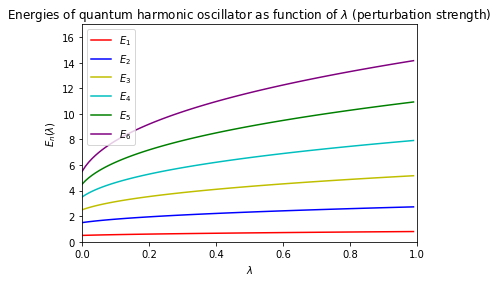

In [405]:
# plot first six energy levels vs lambda (from 0 to 1)
plt.plot(lamb, energy1, 'r', label='$E_1$')
plt.plot(lamb, energy2, 'b',label='$E_2$')
plt.plot(lamb, energy3, 'y',label='$E_3$')
plt.plot(lamb, energy4, 'c',label='$E_4$')
plt.plot(lamb, energy5, 'g',label='$E_5$')
plt.plot(lamb, energy6, 'purple',label='$E_6$')

plt.xlim(0,1)
plt.ylim(0,17)
plt.xlabel('$\lambda$')
plt.ylabel('$E_{n}(\lambda)$')
plt.title('Energies of quantum harmonic oscillator as function of $\lambda$ (perturbation strength)')
plt.legend(loc='best')

plt.show()



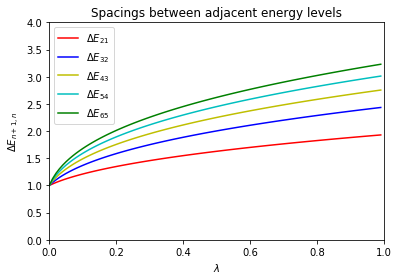

In [406]:
# Plot spacings between two adjacent energy levels

diff1=[j-i for i, j in zip(energy1, energy2)]
diff2=[j-i for i, j in zip(energy2, energy3)]
diff3=[j-i for i, j in zip(energy3, energy4)]
diff4=[j-i for i, j in zip(energy4, energy5)]
diff5=[j-i for i, j in zip(energy5, energy6)]

plt.plot(lamb, diff1, 'r', label='$\Delta E_{21}$')
plt.plot(lamb, diff2, 'b',label='$\Delta E_{32}$')
plt.plot(lamb, diff3, 'y',label='$\Delta E_{43}$')
plt.plot(lamb, diff4, 'c',label='$\Delta E_{54}$')
plt.plot(lamb, diff5, 'g',label='$\Delta E_{65}$')

plt.xlim(0,1)
plt.ylim(0,4)
plt.xlabel('$\lambda$')
plt.ylabel('$\Delta E_{n+1,n}$')
plt.title('Spacings between adjacent energy levels')
plt.legend(loc='upper left')

plt.show()

### Convergence: eigenvalues as funciton of basis size

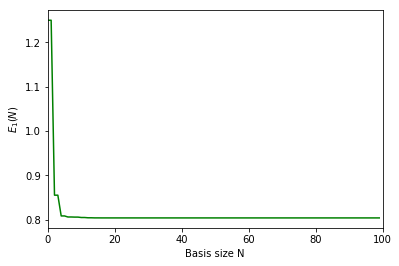

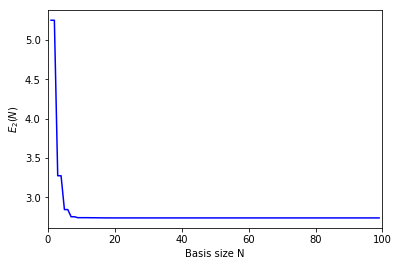

In [328]:
# Basisize vs. lowest energy eigenvalues E_1

basis_size1 = np.arange(0,100,1)

E_1=[]
for i in basis_size1:
    E_1.append(sorted(LA.eigvals(H_lam(i,1)))[0])
    
plt.plot(basis_size1, E_1, 'g-')
plt.xlim(0,100)

plt.xlabel('Basis size N')
plt.ylabel('$E_1(N)$')
plt.show()


# Basisize vs. second lowest energy eigenvalues E_2

E_2=[]
basis_size2 = np.arange(1,100,1)
for i in basis_size2:
    E_2.append(sorted(LA.eigvals(H_lam(i,1)))[1])
    
plt.plot(basis_size2, E_2, 'b-')
plt.xlim(0,100)
plt.xlabel('Basis size N')
plt.ylabel('$E_2(N)$')
plt.show()

Stationary states of unperturned harmonic oscillator:

$\psi_n (x)=\frac{1}{\sqrt{\pi}\sqrt{2^{n}n!}} e^{-\frac{x^2}{2}} H_{n}(x)$

where $H_n (x)$ is Herminite polynomial: $H_0(x)=1$, $H_1(x)=2x$, $H_2(x)=4x^2 -2$, etc.

The first two wavefucntions are:

$\psi_0 = (\frac{1}{\sqrt{\pi}\sqrt{2^{n}n!}} e^{\frac{-x^2}{2}}$

$\psi_1 = (\frac{1}{\sqrt{\pi}\sqrt{2^{n}n!}} \sqrt{2}x e^{\frac{-x^2}{2}}$

### Eigenfunctions of harmonic and anharmonic oscillators

In [338]:
from numpy.polynomial.hermite import hermval
import math

In [390]:
lam=1

xrange = np.linspace(-10,10,1000)

# set hermite polynomial for the nth term


#  set up wavefunction psi_n for harmonic oscilaltor 

def psi_n(n,x):
    # set up hermite polynimial for the nth term
    coeff=[]
    for i in range(n):
        coeff.append(0)
    coeff.append(1)
    
    return 1/( (1/np.pi)**0.25 * (2**n * math.factorial(n))**0.5 ) * np.exp(-0.5*x**2) * hermval(x, coeff)
    
    
    
# set up wavefunction anpsi_n (= psi_n+correction) for anharmonic oscialltor 

def anpsi_n(n,lam,x):
    # set up hermite polynimial for the nth term
    coeff=[]
    for i in range(n):
        coeff.append(0)
    coeff.append(1)
    
    correction = psi_n(n,x) * lam * (6* n**2 + 6*n +3) #first order correction
    return psi_n(n,x) + correction


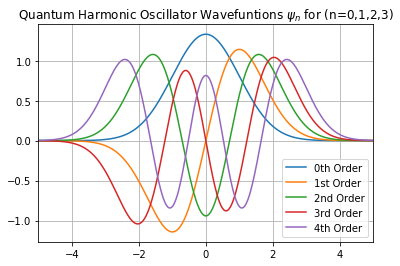

In [399]:
# 0th order wavefunction (harmonic) calulated at each point in xrange
psi_0 = []
for x in xrange:
    psi_0.append(psi_n(0,x))
    
# 1st order wavefunction (harmonic) calulated at each point in xrange    
psi_1 = []
for x in xrange:
    psi_1.append(psi_n(1,x))

# 2nd order wavefunction (harmonic) calulated at each point in xrange
psi_2 = []
for x in xrange:
    psi_2.append(psi_n(2,x))

# 3rd order wavefunction (harmonic) calulated at each point in xrange
psi_3 = []
for x in xrange:
    psi_3.append(psi_n(3,x))    


# 4th rder wavefunction (harmonic) calulated at each point in xrange    
psi_4 = []
for x in xrange:
    psi_4.append(psi_n(4,x))    

plt.plot(xrange, psi_0,label='0th Order')
plt.plot(xrange, psi_1,label='1st Order')
plt.plot(xrange, psi_2,label='2nd Order')
plt.plot(xrange, psi_3,label='3rd Order')
plt.plot(xrange, psi_4,label='4th Order')
plt.xlim(-5,5)

plt.title('Quantum Harmonic Oscillator Wavefuntions $\psi_n$ for (n=0,1,2,3)')
plt.legend()
plt.grid()

plt.show()

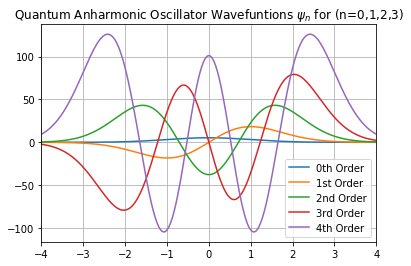

In [402]:
lam=1

# 0th order anharmonic wavefunction calulated at each point in xrange
anpsi_0 = []
for x in xrange:
    anpsi_0.append(anpsi_n(0,lam,x))
    
# 1st order anharmonic wavefunction calulated at each point in xrange    
anpsi_1 = []
for x in xrange:
    anpsi_1.append(anpsi_n(1,lam,x))

# 2nd order anharmonic wavefunction calulated at each point in xrange
anpsi_2 = []
for x in xrange:
    anpsi_2.append(anpsi_n(2,lam,x))
    
    
# 3rd order anharmonic wavefunction calulated at each point in xrange
anpsi_3 = []
for x in xrange:
    anpsi_3.append(anpsi_n(3,lam,x))

    
# 4th order anharmonic wavefunction calulated at each point in xrange
anpsi_4 = []
for x in xrange:
    anpsi_4.append(anpsi_n(4,lam,x))
    
plt.plot(xrange, anpsi_0,label='0th Order')
plt.plot(xrange, anpsi_1,label='1st Order')
plt.plot(xrange, anpsi_2,label='2nd Order')
plt.plot(xrange, anpsi_3,label='3rd Order')
plt.plot(xrange, anpsi_4,label='4th Order')
plt.xlim(-4,4)

plt.title('Quantum Anharmonic Oscillator Wavefuntions $\psi_n$ for (n=0,1,2,3)')
plt.legend()
plt.grid()

plt.show()   

reference: http://physweb.bgu.ac.il/COURSES/QuantumMechCohen/ExercisesPool/EXERCISES/ex_6120_sol_Y11.pdf